In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("cereal.csv")

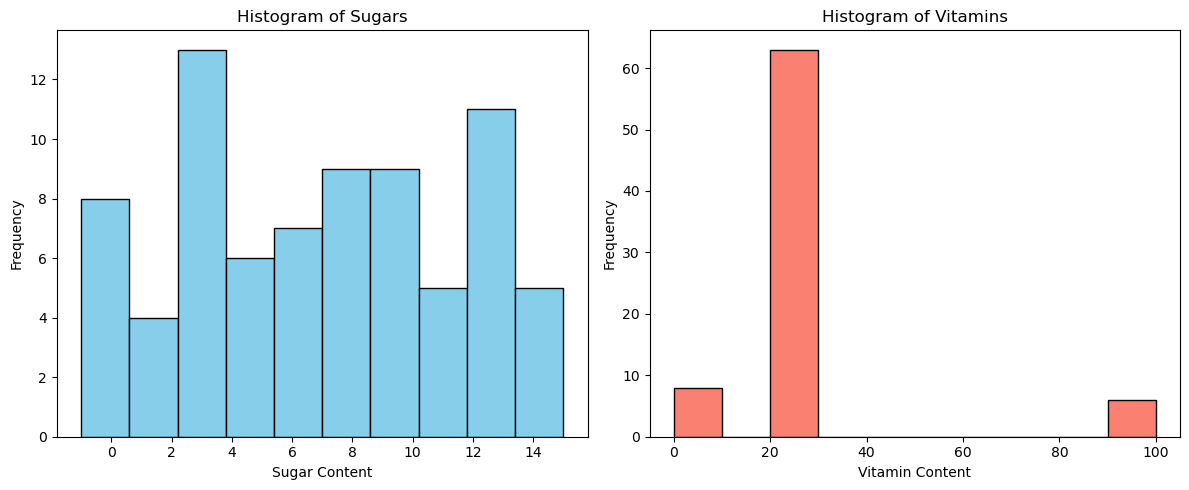

In [4]:
#1. Plot histograms for sugar and vitamins
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['sugars'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Sugars')
plt.xlabel('Sugar Content')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['vitamins'].dropna(), bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Vitamins')
plt.xlabel('Vitamin Content')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig("histograms_sugar_vitamins.png")
plt.show()

C:\Users\thara\AppData\Local\Temp\ipykernel_23272\3824637097.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='manufacturer_full', order=df['manufacturer_full'].value_counts().index, palette='viridis')


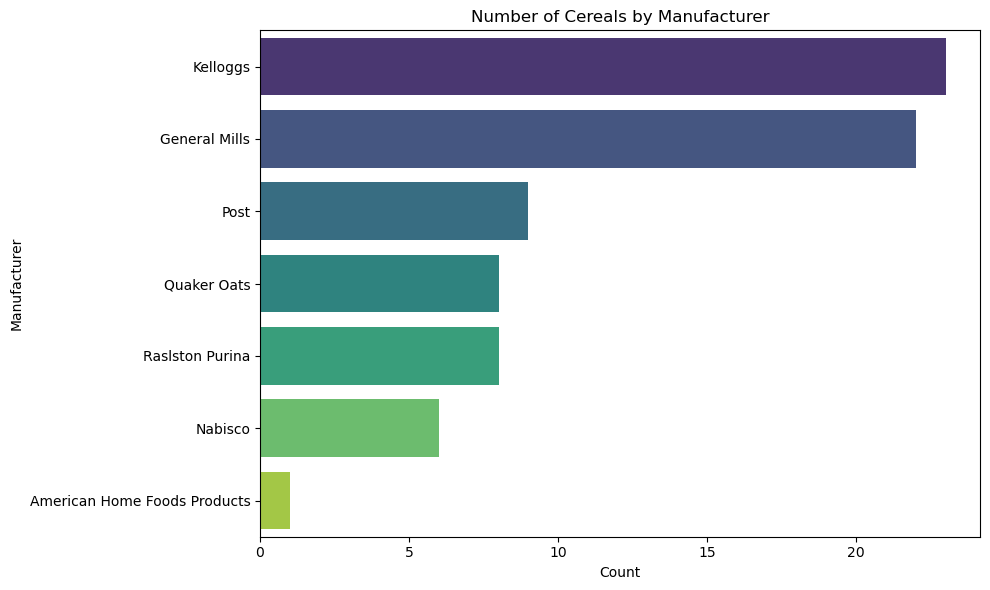

In [6]:
# 2. Map manufacturer codes to full names
manufacturer_map = {
    'N': 'Nabisco', 
    'Q': 'Quaker Oats', 
    'K': 'Kelloggs', 
    'R': 'Raslston Purina', 
    'G': 'General Mills', 
    'P': 'Post', 
    'A': 'American Home Foods Products'
}

df['manufacturer_full'] = df['mfr'].map(manufacturer_map)

# Bar plot: number of cereals per manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='manufacturer_full', order=df['manufacturer_full'].value_counts().index, palette='viridis')
plt.title('Number of Cereals by Manufacturer')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.savefig("cereal_count_by_manufacturer.png")
plt.show()


In [8]:
# 3. Extract target variable and features
y = df['rating']
x = df.select_dtypes(include='number').drop(columns='rating')

# Split into train and test sets (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
# 4. Fit linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse:.2f}")


Mean Squared Error on Test Set: 0.00
